Import the package needed in the kernel

In [2]:
import torch
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Import the data we need

In [3]:
gender_df=pd.read_csv('./titanic_data/gender_submission.csv')
test_df=pd.read_csv('./titanic_data/test.csv')
train_df=pd.read_csv('./titanic_data/train.csv')
display(gender_df.head())
display(test_df.head())
display(train_df.head())

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
display(test_df.shape) #check the size of test dataset
display(train_df.shape) #check the size of train dataset
display(train_df.columns)

(418, 11)

(891, 12)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train_numeric=train_df[['PassengerId','Pclass','Age','Survived','SibSp','Parch','Fare']]
train_value=train_df[['Name','Sex','Ticket','Cabin']]

In [6]:
train_numeric.head()

,PassengerId,Pclass,Age,Survived,SibSp,Parch,Fare
0,1,3,22.0,0,1,0,7.2500
1,2,1,38.0,1,1,0,71.2833
2,3,3,26.0,1,0,0,7.9250
3,4,1,35.0,1,1,0,53.1000
4,5,3,35.0,0,0,0,8.0500


In [7]:
train_value.head()


,Name,Sex,Ticket,Cabin
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123
4,"Allen, Mr. William Henry",male,373450,NaN


In [8]:
train_numeric.drop(columns={'PassengerId'},inplace=True)
train_numeric.head()

C:\Users\10618\AppData\Local\Temp\ipykernel_41960\3280463502.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_numeric.drop(columns={'PassengerId'},inplace=True)


,Pclass,Age,Survived,SibSp,Parch,Fare
0,3,22.0,0,1,0,7.2500
1,1,38.0,1,1,0,71.2833
2,3,26.0,1,0,0,7.9250
3,1,35.0,1,1,0,53.1000
4,3,35.0,0,0,0,8.0500


<Axes: >

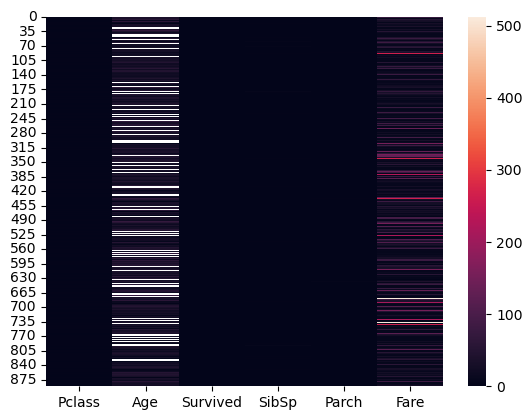

In [9]:
sns.heatmap(train_numeric)

In [10]:
print(train_numeric.corr())

            Pclass       Age  Survived     SibSp     Parch      Fare
Pclass    1.000000 -0.369226 -0.338481  0.083081  0.018443 -0.549500
Age      -0.369226  1.000000 -0.077221 -0.308247 -0.189119  0.096067
Survived -0.338481 -0.077221  1.000000 -0.035322  0.081629  0.257307
SibSp     0.083081 -0.308247 -0.035322  1.000000  0.414838  0.159651
Parch     0.018443 -0.189119  0.081629  0.414838  1.000000  0.216225
Fare     -0.549500  0.096067  0.257307  0.159651  0.216225  1.000000


In [11]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
women_survived=train_df[train_df.Sex=='female']['Survived']
temp=train_df.groupby(['Sex','Survived']).PassengerId.count()# To split the group by the groupby function
temp

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: PassengerId, dtype: int64

In [13]:
women_survived.sum()

233

In [14]:
women_survived_rate=women_survived.sum()/len(women_survived)
print(f'Women survived ratio is {women_survived_rate:.2%}')

Women survived ratio is 74.20%


In [15]:
men_survived=train_df[train_df.Sex=="male"]['Survived']
men_survived_rate=men_survived.sum()/len(men_survived)
print(f"Men survived ratio is {men_survived_rate:.2%}")

Men survived ratio is 18.89%


From the ratio, obviously,the ratio in male is less than which in women

**Not like the common sense**

**Learning Model choose -- random forest model**

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
y=train_df['Survived']
feture=['Pclass','Sex','SibSp','Parch']
X=pd.get_dummies(train_df[feture])
X_test=pd.get_dummies(test_df[feture])
model=RandomForestClassifier(n_estimators=100,max_depth=5,random_state=1)
model.fit(X,y)
predictions=model.predict(X_test)
output=pd.DataFrame({'PassengerId':test_df.PassengerId,'Survived':predictions})
output.to_csv('result.csv',index=False)
print("Done")

Done


1. We should focued on the data that X and y. y means the value we have got,X is the train data.
2. The konowledge of scikit-learn kernel is needed

## Light Data Exploration 
1. For numeric data
- Made histplot to get the distributions of the data
- get the correlationship
- Pviot tablecomparing survival rate across numeric data

2. For categorical data
- Made bar charts to understand balance of classes
- Made pivot tables to understand relationship with survial
  

In [18]:
train_df.info() # data type and null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
train_df.describe() # understand better of the data,
#tendency of data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
train_df.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [21]:
df_num = train_df[['Age','SibSp','Parch','Fare']]
df_cat = train_df[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

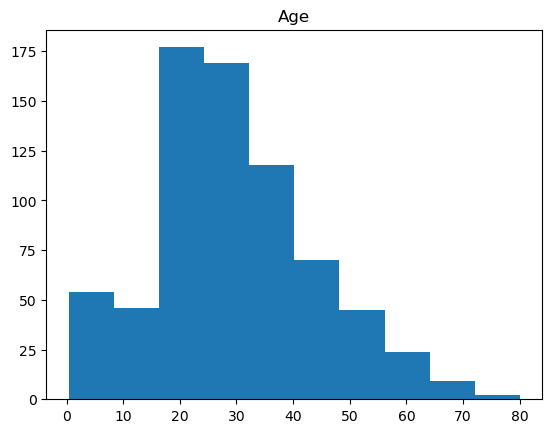

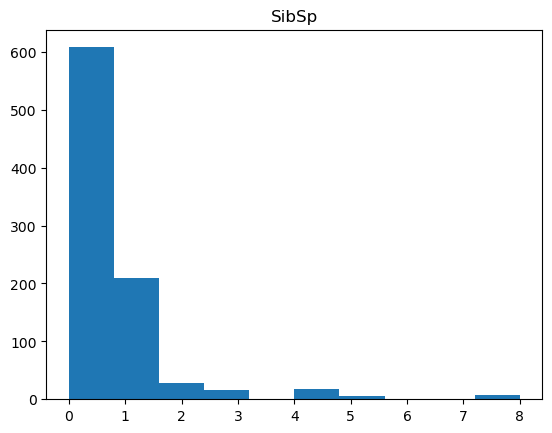

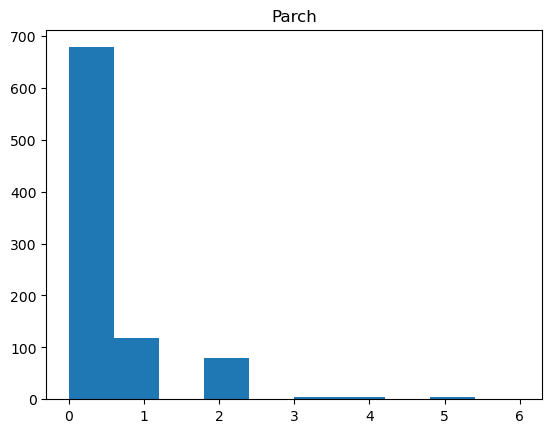

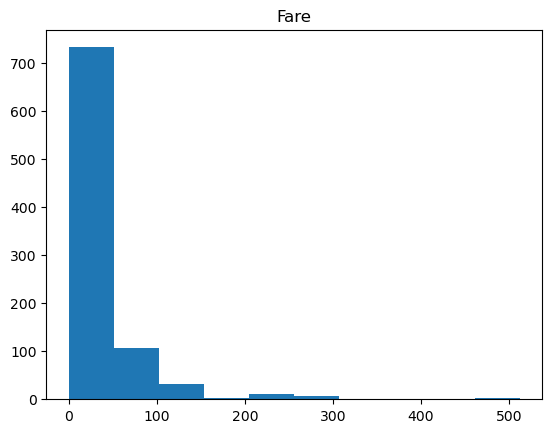

In [22]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

Obviously, there are some kind of data is not normal distribution so we need preprocess the data for next step.

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<Axes: >

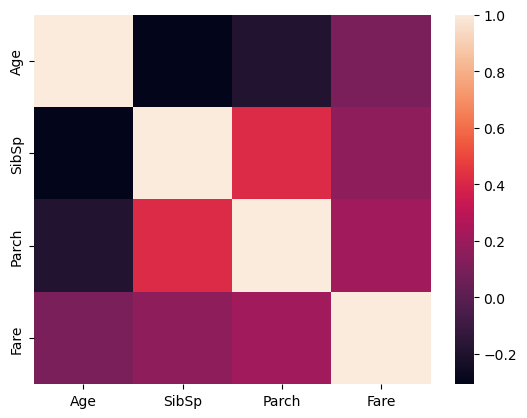

In [23]:
print(df_num.corr())
sns.heatmap(df_num.corr())

In [24]:
pd.pivot_table(train_df,index='Survived',values=df_num.columns)
# If the value of columns is greater than number of index, it will calculate the mean value to replace.

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


In [25]:
# for i in df_cat.columns:
#     sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts())
#     plt.title(i)
#     plt.show()

In [26]:
for i in df_cat.columns:
    print(df_cat[i].value_counts)
    print(df_cat[i].value_counts().index)

<bound method IndexOpsMixin.value_counts of 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64>
Index([0, 1], dtype='int64', name='Survived')
<bound method IndexOpsMixin.value_counts of 0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64>
Index([3, 1, 2], dtype='int64', name='Pclass')
<bound method IndexOpsMixin.value_counts of 0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object>
Index(['male', 'female'], dtype='object', name='Sex')
<bound method IndexOpsMixin.value_counts of 0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888       

In [28]:
print(pd.pivot_table(train_df,index='Survived',columns='Pclass',values='Ticket',aggfunc='count'))
print('-'*20)
print(pd.pivot_table(train_df,index='Survived',columns='Sex',values='Ticket',aggfunc='count'))
print('-'*20)
print(pd.pivot_table(train_df,index='Survived',columns='Embarked',values='Ticket',aggfunc='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
--------------------
Sex       female  male
Survived              
0             81   468
1            233   109
--------------------
Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


#### The ticket and cabin graphs are very messy. We need to do engeering on it
1. Cabin-Simplify the cabin or the purchase of tickets across multiple cabins.
2. Tickets- Do different types impact survival rates?
3. Does a person's title relate to survival rates? 